In [2]:
%matplotlib  inline

import os
import re
import roman
import requests as r
import random as rand
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

Get card link list 
-----------------

In [174]:
interp_url = "https://www.trustedtarot.com"

In [175]:
resp = r.get(interp_url + "/cards/")
soup = BeautifulSoup(resp.text, "lxml")
links = soup.find_all("a") # get all links on page

In [186]:
links = [x['href'] for x in links] # get all URLs
links = [interp_url + x for x in links if re.search(r'/cards/[a-z-]*/', x) != None] # get all URLs about tarot cards

In [203]:
# links

In [187]:
nos = { 'ace': '01', 'two': '02', 'three': '03', 'four': '04', 'five': '05',
       'six': '06', 'seven': '07', 'eight': '08', 'nine': '09', 'ten': '10',
       'page': '11', 'knight': '12', 'queen': '13', 'king': '14'}  

Get card
-------------

In [220]:
card_no = str(int(rand.uniform(1, 78)))
# card_no

'8'

In [221]:
# clear & shuffle
resp = r.get("https://serennu.com/tarot/pick.php?nc=0&deck=")

In [222]:
resp = r.get("https://serennu.com/tarot/pick.php?nc=" + card_no)

In [223]:
soup = BeautifulSoup(resp.text, "lxml")

In [224]:
t = soup.find_all("table")
ser_name = t[1].find_all("font")[3].text
ser_name

'Four of Pentacles'

In [225]:
def get_tt_name(card_name):
    '''transform serennu.com name in 
    trustedtarot.com name'''
    card_number = card_name.split()[-1]
    new_cn = card_name[:]
    try:
        roman.fromRoman(card_number) # found roman number
        new_cn = " ".join(card_name.split()[:-1]) # eliminate roman number
    except:
        print("ok")

    new_cn = "-".join([x.lower() for x in new_cn.split()])
    return new_cn

def get_img_name(card_name):
    '''get name of local image file'''
    filename = "" 
    if "of" in card_name.split() and "Wheel" not in card_name: # minor
        no = card_name.split()[0].lower()
        suit = card_name.split()[-1]
        if suit == "Pentacles":
            filename +="Pents"
        else:
            filename += suit
        filename += nos[no]
    else: # major
        filename += "RWS_Tarot_"
        no = card_name.split()[-1]
        try:
            no = roman.fromRoman(no) # found roman number
        except:
            print("no roman numeral")
        if len(card_name.split()) > 2 and "Wheel" not in card_name:
            new_cn = " ".join(card_name.split()[1:-1]) # eliminate the and roman number
        else:
            new_cn = " ".join(card_name.split()[:-1])
        if int(no) < 10:
            filename += "0"
        filename += str(no) + "_" + "_".join(new_cn.split())
    return filename + ".jpg"

In [226]:
card_name = get_tt_name(ser_name)
img_name = get_img_name(ser_name)
card_name, img_name

ok


('four-of-pentacles', 'Pents04.jpg')

Get interpretation
------------

In [227]:
# card_name = "the-fool"
int_url = [x for x in links if card_name in x][0]

In [228]:
resp = r.get(int_url)

In [229]:
soup = BeautifulSoup(resp.text, "lxml")

In [230]:
idx_start = soup.text.find("Yes / No Key Interpretation")
idx_end = soup.text.find("Key Dates")

In [231]:
soup.text[idx_start:idx_end].split(".")[:-1]

['Yes / No Key Interpretation\nThe Four of Pentacles stands for security, stability, and the presence of elemental balance in your life',
 ' It suggests being smart and frugal with what you have and remaining on a strict budget but with the security of only positive outcomes',
 ' Moving forward will likely require tenacity',
 ' Your answer is yes']

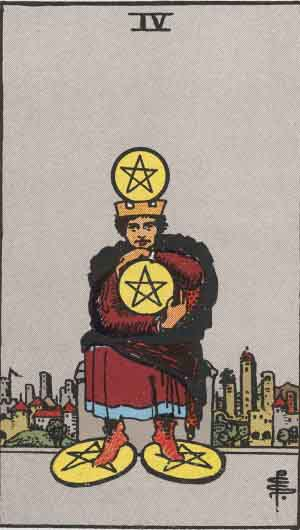

In [232]:
PATH = os.getcwd() + "/cards/"
Image(filename = PATH + img_name, width=200)